## Is it a shirt or a pair of trousers?

In [1]:
# checking internet connection.

import socket,warnings

try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")
     
import os

In [2]:
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries> 
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle:
    !pip install -Uqq fastbook
    !pip install -Uqq fastai

In [3]:
# function which returns results of a search on DuckDuckGo
from fastbook import search_images_ddg

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images))

In [8]:
# downloading images from search results

from fastcore.all import *
from fastai.vision.utils import *
from time import sleep

searches = 'shirt','trousers'
path = Path('shirt_or_trousers')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'shirt photo'
Searching for 'trousers photo'


In [10]:
# removing images that had issues at download
from fastai.vision.all import *

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

epoch,train_loss,valid_loss,error_rate,time
0,1.430624,0.231967,0.125000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.763850,0.220150,0.062500,00:00
1,0.477780,0.189891,0.062500,00:00
2,0.372053,0.156254,0.062500,00:00


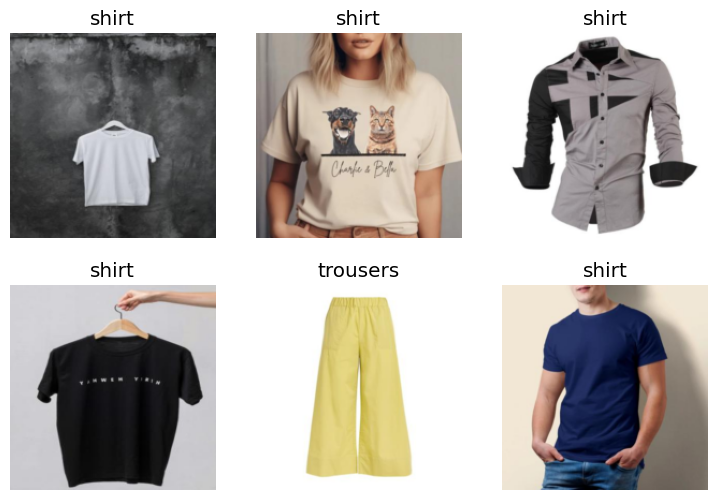

In [20]:
''' train data model starting from pretrained vision model resnet18 
and fine-tuning it '''

from fastcore.all import *
from fastdownload import download_url
    
dls = DataBlock(
blocks=(ImageBlock, CategoryBlock), 
get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)
sleep(10)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Searching for 'weird shirt'


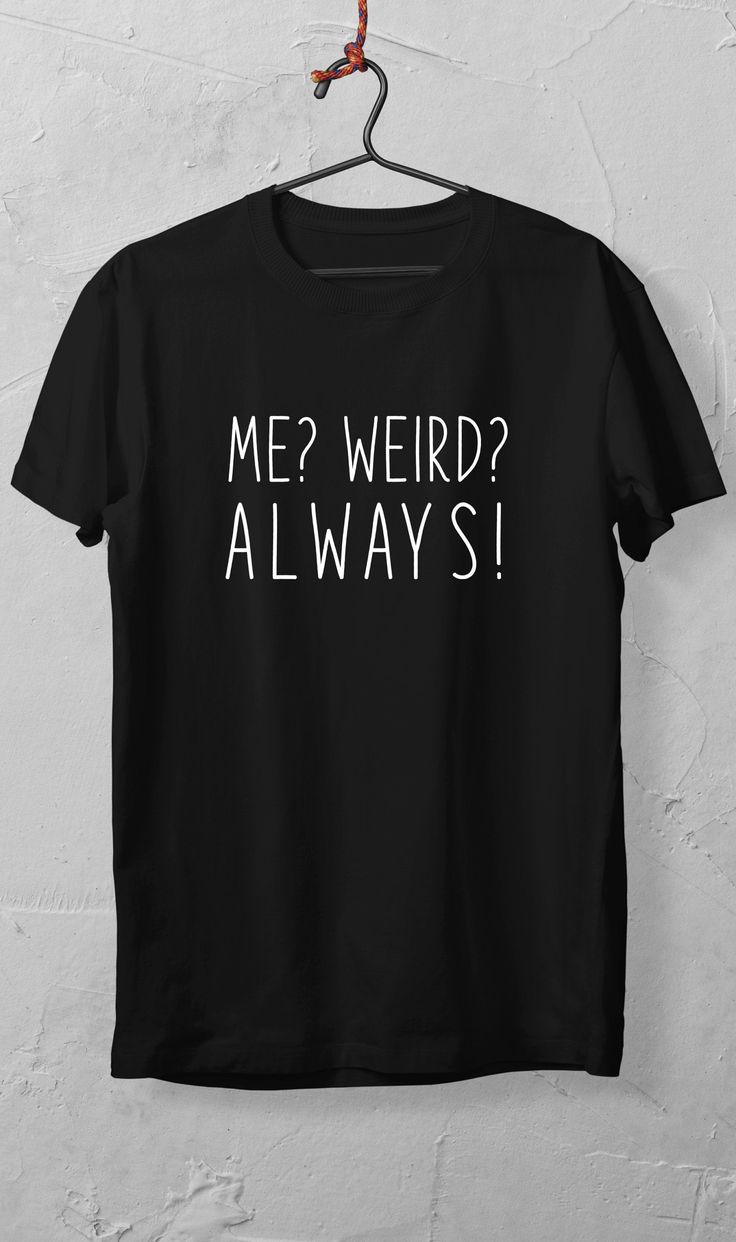

This is a: shirt.
Probability it's a shirt: 0.9987


In [18]:
from fastai.vision.all import *

tests = search_images('weird shirt', 1)
dest = 'shirt_to_check.jpg'
download_url(tests[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)
display(im)


is_shirt,_,probs = learn.predict(PILImage.create("shirt_to_check.jpg"))
print(f"This is a: {is_shirt}.")
print(f"Probability it's a shirt: {probs[0]:.4f}")
